In [8]:
#name:-subodh Narayan Sah
#Bl.EN.U4CSE21199
#Lab4

In [9]:
#A1. For the data table provided below, calculate the entropy associated with each attribute / feature at the root node. Using this information, identify the first feature that you’d select for constructing 
#the decision tree. Use Information Gain as the impurity measure to identify the root node.‘buys_computer’ is the class label.
import pandas as pd
import numpy as np
data=[["<=30","high","no","fair","no"],
      ["<=30","high","no","excellent","no"],
       ["31...40","high","no","fair","yes"],
       [">=40","medium","no","fair","yes"],
      [">=40","low","yes","fair","yes"],
      [">=40","low","yes","excellent","no"],
      ["31...40","low","yes","excellent","yes"],
      ["<=30","medium","no","fair","no"],
       ["<=30","low","yes","fair","yes"],
       [">40","medium","yes","fair","yes"],
      ["<=30","medium","yes","excellent","yes"],
      ["31...40","medium","no","excellent","yes"],
       ["31...40","high","yes","fair","yes"],
      [">40","medium","no","excellent","no"]   
     ]
columnname=["age","income","student","credit_rating","buys_computer"]
df=pd.DataFrame(data,columns=columnname)
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31...40,high,no,fair,yes
3,>=40,medium,no,fair,yes
4,>=40,low,yes,fair,yes
5,>=40,low,yes,excellent,no
6,31...40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
df_encoded = pd.get_dummies(df, columns=['age', 'income', 'student', 'credit_rating'])

# Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['buys_computer'])
y = df_encoded['buys_computer']

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy')  # Use entropy as the impurity measure

# Fit the classifier on the data
clf.fit(X, y)

# Print the feature importances (information gain)
feature_importances = clf.feature_importances_
print("Feature Importances (Information Gain):")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# Find the root node (feature with highest information gain)
root_node_index = feature_importances.argmax()
root_node = X.columns[root_node_index]
print("\nThe root node is:", root_node)

Feature Importances (Information Gain):
age_31...40: 0.24035267388703113
age_<=30: 0.0
age_>40: 0.0
age_>=40: 0.2742053734635072
income_high: 0.0
income_low: 0.0
income_medium: 0.15192946522259376
student_no: 0.0
student_yes: 0.21123657918595443
credit_rating_excellent: 0.0
credit_rating_fair: 0.12227590824091343

The root node is: age_>=40


In [11]:
'''
A2. Create a Decision Tree for the above data. Get the depth of the constructed tree.
model = DecisionTreeClassifier()
model = ml_model.fit(Tr_X,Tr_y)
model.score(Tr_X, Tr_y)#Training Set accuracy
print(model.get_depth())#print the tree depth
'''
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model = model.fit(Tr_X,Tr_y)
print(model.score(Tr_X, Tr_y))#Training Set accuracy
print(model.get_depth())#print the tree depth

1.0
4


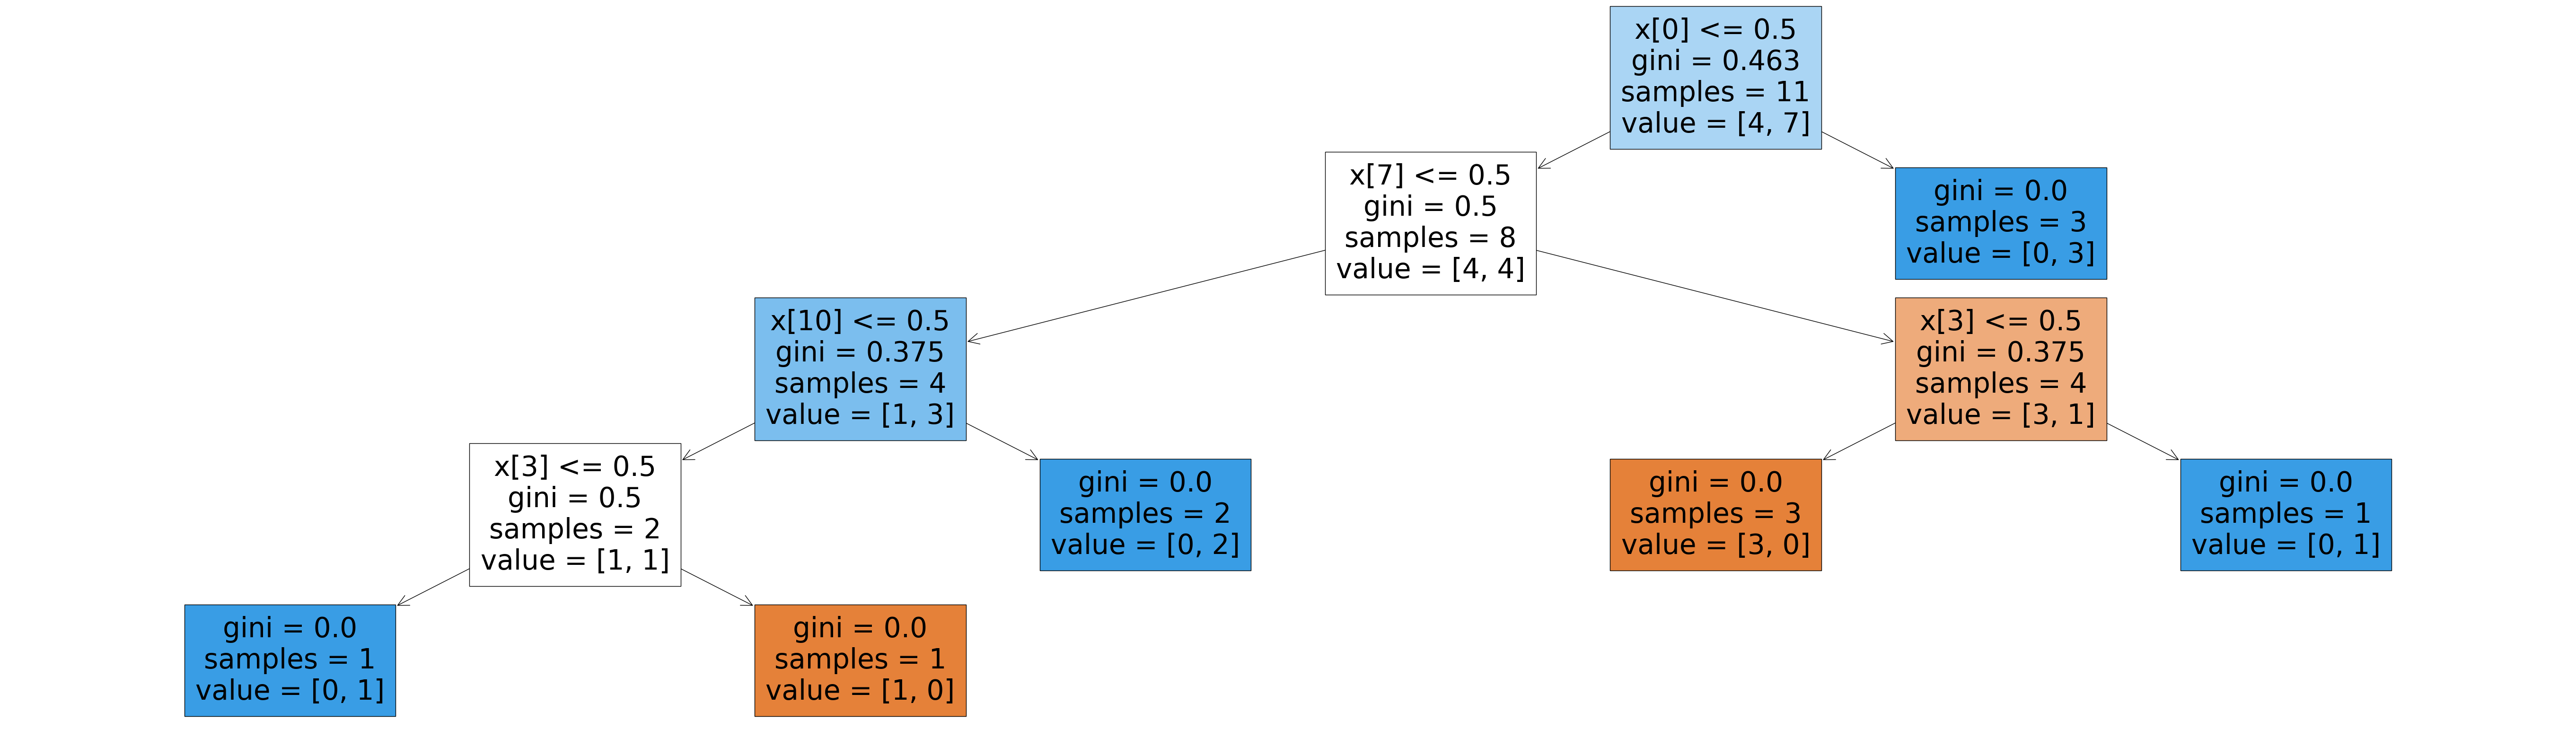

In [7]:
'''
A3. Visualize the constructed tree with plot_tree() command. Following code snippet for help.
import matplotlib.pyplot as plt 
from sklearn import tree
plt.figure(figsize=(70,20))
plot_tree(model, filled=True)
plt.show()
'''
import matplotlib.pyplot as plt 
from sklearn import tree
plt.figure(figsize=(70,20))
tree.plot_tree(model, filled=True)
plt.show()

In [4]:
'''A4. Create a Decision Tree classifier on your project data. Study the accuracy for training and test 
data and infer the accuracy of tree construction. Plot the Decision Tree obtained above. Below code 
for help.'''
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
df=pd.read_csv("SolarPrediction.csv")

bins = [0, 800, 1610, float('inf')]
labels = ['Low', 'Medium', 'High']

# Create the 'Radiation_Class' column based on the bins and labels
df['Radiation_Class'] = pd.cut(df['Radiation'], bins=bins, labels=labels)

# Split your data into training and testing sets
X = df.loc[:, "Temperature":"Speed"]
y = df["Radiation_Class"]
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=0)
model = DecisionTreeClassifier()
model = model.fit(Tr_X,Tr_y)
print(model.score(Tr_X, Tr_y))#Training Set accuracy
print(model.score(Te_X,Te_y))#Test Set Accuracy

1.0
0.9092994799632915


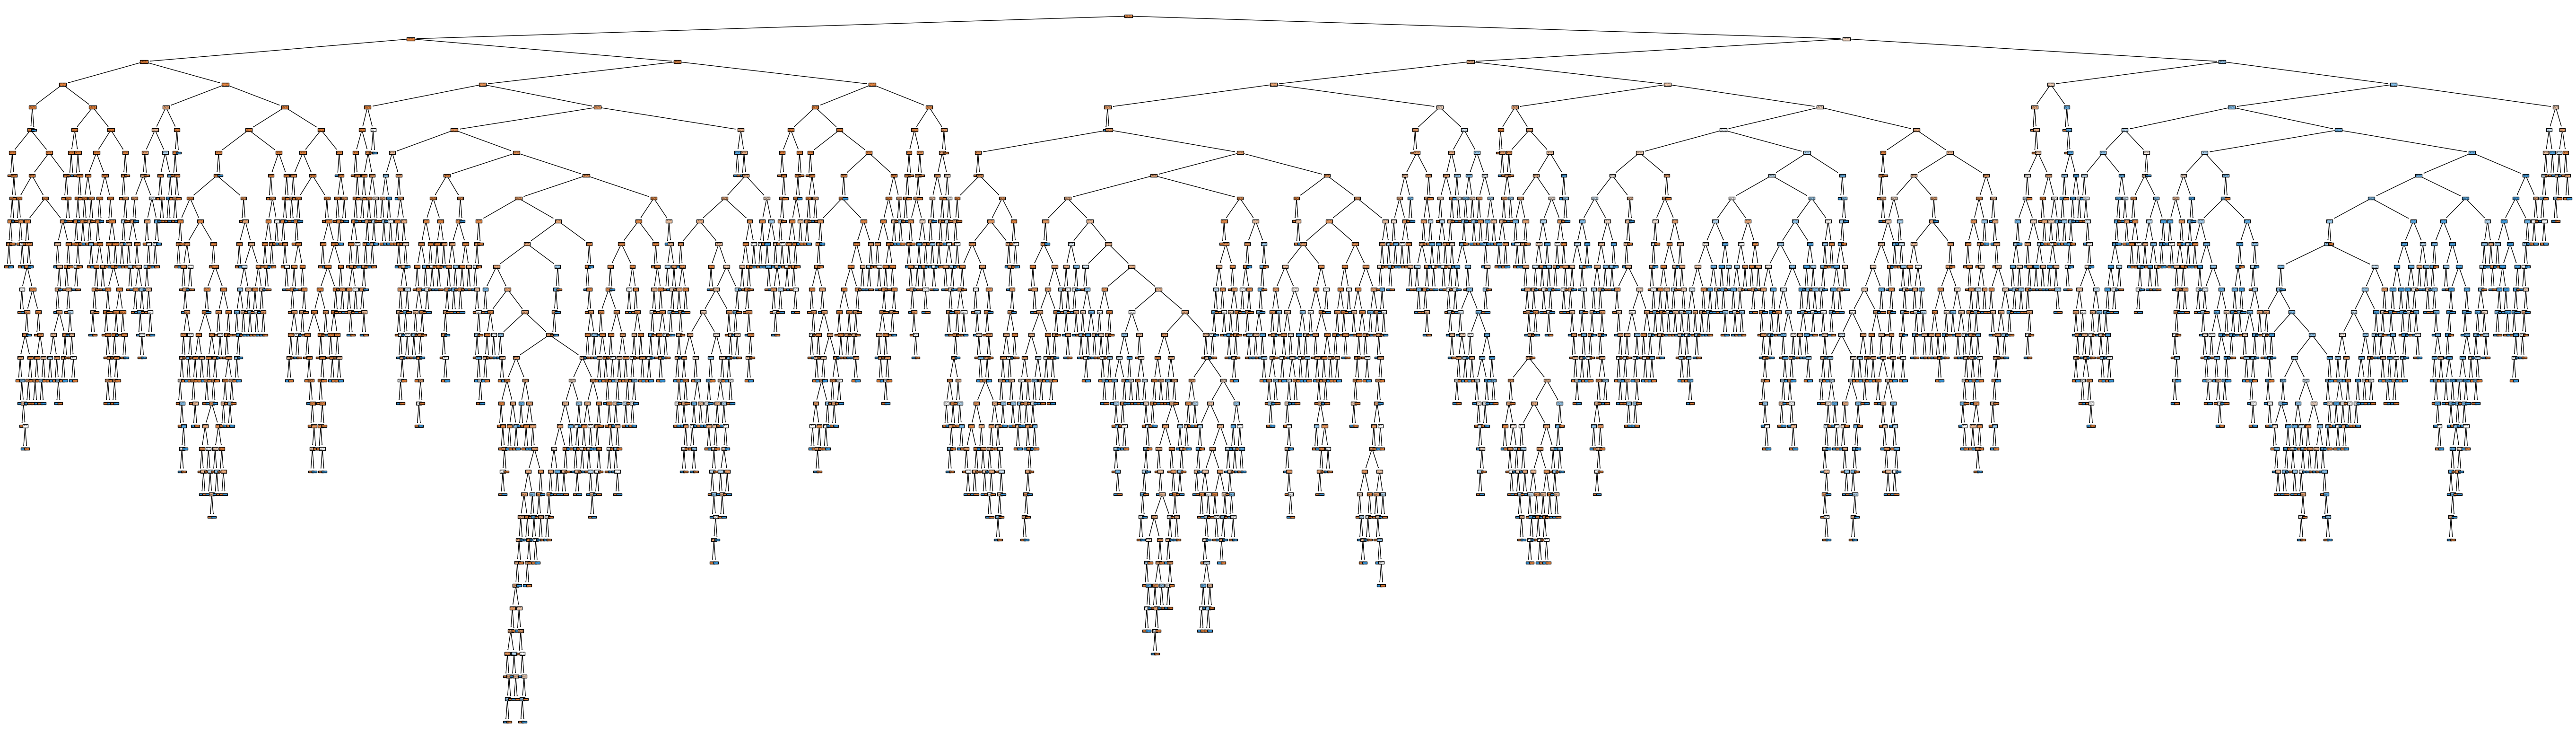

In [6]:
import matplotlib.pyplot as plt 
from sklearn import tree
plt.figure(figsize=(70,20))
tree.plot_tree(model, filled=True)
plt.show()

Training Accuracy: 0.93
Testing Accuracy: 0.93


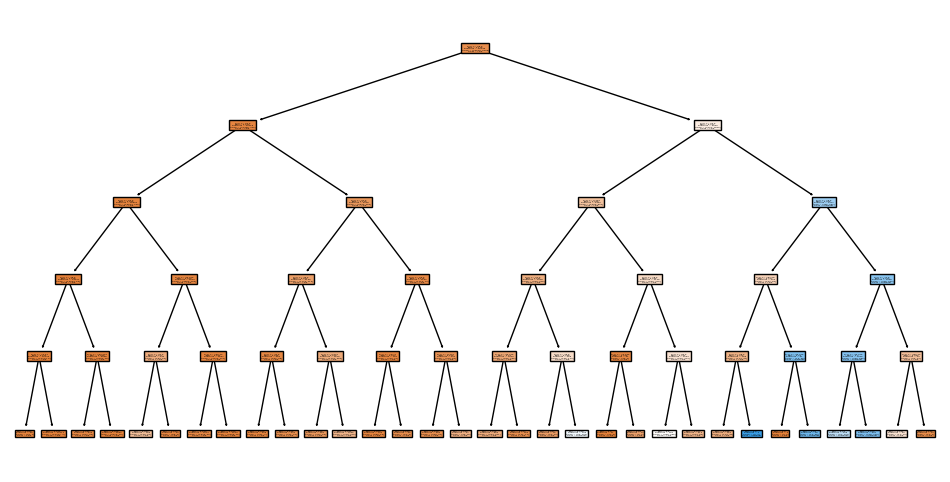

In [12]:
#A5. Impose a max_depth constraint on the tree construction. Construct the tree again and check the accuracies. Visualize the tree constructed with 
#max_depth constraint.
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class_names = ["Low", "Medium", "High"]
# Split the dataset into training and testing set
X = df.loc[:, "Temperature":"Speed"]
y = df["Radiation_Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier with max_depth=5
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy on training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


# Visualize the decision tree with max_depth=5
plt.figure(figsize=(12, 6))
plot_tree(model,class_names=class_names, filled=True)
plt.show()

Default Criterion (Gini Impurity) Results:
Training Accuracy: 0.93
Testing Accuracy: 0.93

Entropy Criterion Results:
Training Accuracy: 0.93
Testing Accuracy: 0.92


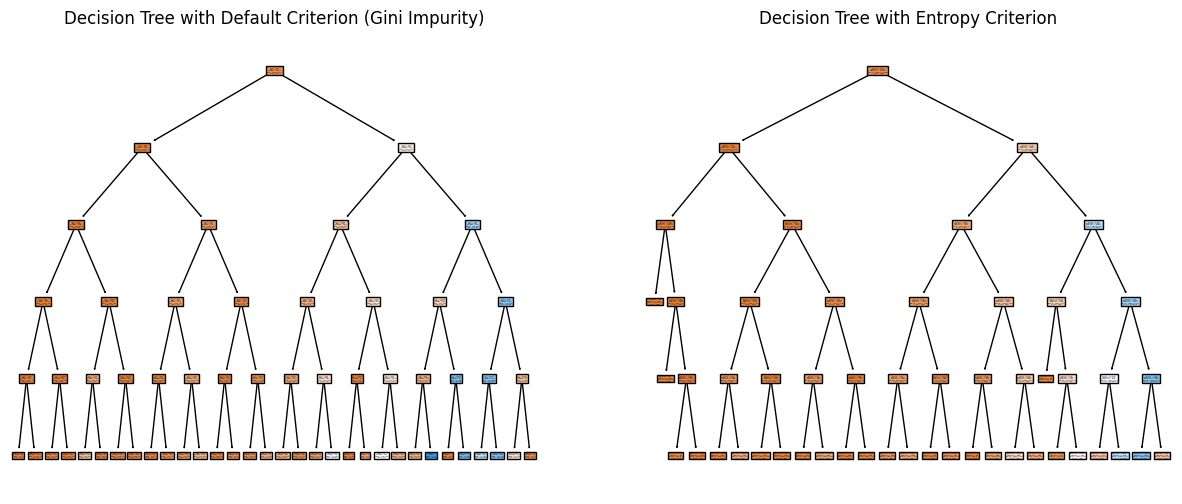

In [13]:
#A6. Study the criterion of the DT in the above model. Change the criterion to “Entropy” and study the model & graph. Find the differences between the 
#default criterion and entropy criterion. Refer code below for criterion.
#DecisionTreeClassifier(criterion="entropy")

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class_names = ["Low", "Medium", "High"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier with the default criterion ("Gini impurity")
model_default = DecisionTreeClassifier(max_depth=5)  # Default criterion is "Gini impurity"
model_default.fit(X_train, y_train)

# Create and train the decision tree classifier with criterion="entropy"
model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model_entropy.fit(X_train, y_train)

# Predict on training and testing data for both models
y_train_pred_default = model_default.predict(X_train)
y_test_pred_default = model_default.predict(X_test)
y_train_pred_entropy = model_entropy.predict(X_train)
y_test_pred_entropy = model_entropy.predict(X_test)

# Calculate accuracy on training and testing data for both models
train_accuracy_default = accuracy_score(y_train, y_train_pred_default)
test_accuracy_default = accuracy_score(y_test, y_test_pred_default)
train_accuracy_entropy = accuracy_score(y_train, y_train_pred_entropy)
test_accuracy_entropy = accuracy_score(y_test, y_test_pred_entropy)

print("Default Criterion (Gini Impurity) Results:")
print(f"Training Accuracy: {train_accuracy_default:.2f}")
print(f"Testing Accuracy: {test_accuracy_default:.2f}")

print("\nEntropy Criterion Results:")
print(f"Training Accuracy: {train_accuracy_entropy:.2f}")
print(f"Testing Accuracy: {test_accuracy_entropy:.2f}")

# Visualize the decision trees
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plot_tree(model_default, class_names=class_names, filled=True)
plt.title("Decision Tree with Default Criterion (Gini Impurity)")

plt.subplot(1, 2, 2)
plot_tree(model_entropy, class_names=class_names, filled=True)
plt.title("Decision Tree with Entropy Criterion")

plt.show()


In [17]:
#A7. Construct a random forest classifier on your project data. Find the differences between the decision tree & random forest classifiers with 
#the help of the performance metrics. 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Train a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(max_depth=5)
decision_tree_classifier.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

# Evaluate Decision Tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_decision_tree)
precision_dt = precision_score(y_test, y_pred_decision_tree, average='weighted')
recall_dt = recall_score(y_test, y_pred_decision_tree, average='weighted')
f1_score_dt = f1_score(y_test, y_pred_decision_tree, average='weighted')
confusion_matrix_dt = confusion_matrix(y_test, y_pred_decision_tree)

# Train a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=5)
random_forest_classifier.fit(X_train, y_train)
y_pred_random_forest = random_forest_classifier.predict(X_test)

# Evaluate Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_random_forest)
precision_rf = precision_score(y_test, y_pred_random_forest, average='weighted')
recall_rf = recall_score(y_test, y_pred_random_forest, average='weighted')
f1_score_rf = f1_score(y_test, y_pred_random_forest, average='weighted')
confusion_matrix_rf = confusion_matrix(y_test, y_pred_random_forest)

# Compare performance metrics
print("Decision Tree Classifier Metrics:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1 Score: {f1_score_dt:.2f}")
print("Confusion Matrix:\n", confusion_matrix_dt)

print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print(f"F1 Score: {f1_score_rf:.2f}")
print("Confusion Matrix:\n", confusion_matrix_rf)


Decision Tree Classifier Metrics:
Accuracy: 0.93
Precision: 0.92
Recall: 0.93
F1 Score: 0.92
Confusion Matrix:
 [[5802  111]
 [ 375  250]]

Random Forest Classifier Metrics:
Accuracy: 0.92
Precision: 0.91
Recall: 0.92
F1 Score: 0.91
Confusion Matrix:
 [[5798  115]
 [ 381  244]]
